## KING COUNTRY HOUSE SALES

### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


### 2. Load the Dataset

In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (21)\\house_sales.csv")
df

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
22683,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
22684,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
22685,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


### 3. Dataset Overview

In [4]:
df.size

499114

In [5]:
df.shape

(22687, 22)

In [6]:
df.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise

In [8]:
df.describe()

,SalePrice,PropertyID,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode
count,2.268700e+04,2.268700e+04,22687.000000,22687.000000,2.268700e+04,22687.000000,2.268700e+04,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,2.268700e+04,2.268700e+04,22687.000000
mean,5.079244e+05,4.666164e+09,392181.923569,0.901153,5.652333e+05,1.018821,1.174633e+04,2080.165734,293.233305,2.176500,3.367744,7.680963,1971.195266,102.314762,0.205801,2.203211e+05,3.004712e+05,98078.526910
std,3.466368e+05,2.877700e+09,36349.866645,0.083525,3.854029e+05,0.159752,2.901602e+04,913.742170,439.454608,0.768027,0.904379,1.180464,30.313796,440.579006,0.554216,1.829177e+05,2.265750e+05,52.342559
min,3.000000e+03,1.000102e+06,311600.000000,0.715993,3.368000e+03,1.000000,4.940000e+02,370.000000,0.000000,0.000000,0.000000,3.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,98001.000000
25%,3.250000e+05,2.212325e+09,360700.000000,0.828814,3.605630e+05,1.000000,4.800000e+03,1420.000000,0.000000,1.750000,3.000000,7.000000,1950.000000,0.000000,0.000000,1.070000e+05,1.720000e+05,98034.000000
50%,4.246500e+05,4.006000e+09,403200.000000,0.926471,4.713150e+05,1.000000,7.200000e+03,1910.000000,0.000000,2.250000,3.000000,7.000000,1977.000000,0.000000,0.000000,1.820000e+05,2.460000e+05,98065.000000
75%,5.850000e+05,7.417700e+09,421200.000000,0.967831,6.494110e+05,1.000000,9.794000e+03,2540.000000,580.000000,2.500000,4.000000,8.000000,2000.000000,0.000000,0.000000,2.670000e+05,3.610000e+05,98117.000000
max,1.100000e+07,9.906000e+09,435200.000000,1.000000,1.164486e+07,5.000000,1.024068e+06,10740.000000,3500.000000,8.000000,33.000000,13.000000,2015.000000,2016.000000,3.000000,5.538000e+06,5.772000e+06,98354.000000


### 4. Data Cleaning

In [9]:
#  check missing values
df.isna().sum()

DocumentDate       0
SalePrice          0
PropertyID         0
PropertyType       0
ym                 0
zhvi_px            0
zhvi_idx           0
AdjSalePrice       0
NbrLivingUnits     0
SqFtLot            0
SqFtTotLiving      0
SqFtFinBasement    0
Bathrooms          0
Bedrooms           0
BldgGrade          0
YrBuilt            0
YrRenovated        0
TrafficNoise       0
LandVal            0
ImpsVal            0
ZipCode            0
NewConstruction    0
dtype: int64

In [10]:
# duplicate values
df.duplicated().sum()

np.int64(0)

### 5. Exploratory Data Analysis (EDA)

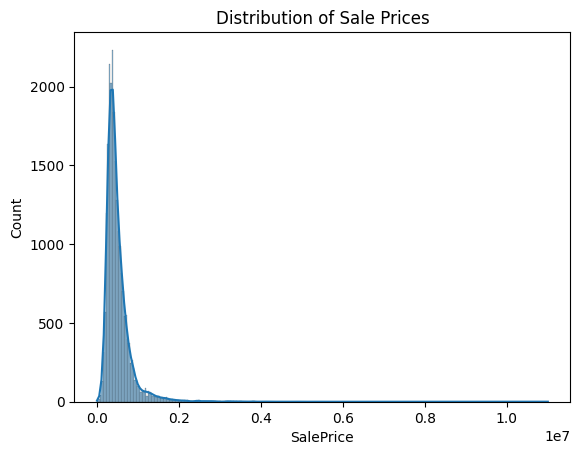

In [11]:
# Distribution of Sale Price
plt.figure()
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()


## Converting Data Types

### Convert Date Properly

In [12]:
df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])
df['year'] = df['DocumentDate'].dt.year
df['month'] = df['DocumentDate'].dt.month
df.drop('DocumentDate', axis=1, inplace=True)

### Convert ym to number

In [13]:
df['ym'] = pd.to_datetime(df['ym'])
df['ym'] = df['ym'].dt.year * 100 + df['ym'].dt.month

#### 5.1. Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['PropertyType'] = le.fit_transform(df['PropertyType'])

In [15]:
df.head()

,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,year,month
0,280000,1000102,0,201409,405100,0.930836,300805.0,2,9373,2400,...,7,1991,0,0,70000,229000,98002,False,2014,9
1,1000000,1200013,1,200606,404400,0.929228,1076162.0,1,20156,3764,...,10,2005,0,0,203000,590000,98166,True,2006,6
2,745000,1200019,1,200701,425600,0.977941,761805.0,1,26036,2060,...,8,1947,0,0,183000,275000,98166,False,2007,1
3,425000,2800016,1,200802,418400,0.961397,442065.0,1,8618,3200,...,7,1966,0,0,104000,229000,98168,False,2008,2
4,240000,2800024,1,201303,351600,0.807904,297065.0,1,8620,1720,...,7,1948,0,0,104000,205000,98168,False,2013,3


#### 5.2. Correlation

In [16]:
# correlation
corr = df.corr()
corr

,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,year,month
SalePrice,1.000000,-0.026166,-0.081641,-0.066844,0.096750,0.096750,0.985465,0.023782,0.134767,0.689898,...,0.666884,0.082345,0.105955,-0.011710,0.804961,0.825453,-0.071767,0.048572,-0.066930,0.006057
PropertyID,-0.026166,1.000000,0.025262,0.007510,-0.015217,-0.015217,-0.024586,-0.014106,-0.114654,-0.020190,...,-0.010178,0.031264,-0.010443,-0.032584,-0.032604,-0.011606,-0.020161,0.046793,0.007436,0.005357
PropertyType,-0.081641,0.025262,1.000000,0.011126,-0.012612,-0.012612,-0.080391,-0.324832,-0.082389,-0.183977,...,0.044377,0.308784,-0.050353,0.005250,-0.136630,-0.012011,0.092465,0.280472,0.011294,-0.012154
ym,-0.066844,0.007510,0.011126,1.000000,-0.660418,-0.660418,0.028057,-0.015403,0.026377,0.006150,...,0.024727,-0.007945,0.011706,-0.001790,0.028131,0.017683,0.021746,-0.065564,0.999904,0.008912
zhvi_px,0.096750,-0.015217,-0.012612,-0.660418,1.000000,1.000000,-0.044657,0.015234,-0.012913,-0.021532,...,-0.046050,-0.016218,-0.000791,0.008416,-0.023738,-0.031515,-0.003131,0.038405,-0.660664,0.016435
zhvi_idx,0.096750,-0.015217,-0.012612,-0.660418,1.000000,1.000000,-0.044657,0.015234,-0.012913,-0.021532,...,-0.046050,-0.016218,-0.000791,0.008416,-0.023738,-0.031515,-0.003131,0.038405,-0.660664,0.016435
AdjSalePrice,0.985465,-0.024586,-0.080391,0.028057,-0.044657,-0.044657,1.000000,0.022548,0.137147,0.695147,...,0.675566,0.082133,0.107782,-0.012253,0.812183,0.833368,-0.069676,0.040934,0.027994,0.004603
NbrLivingUnits,0.023782,-0.014106,-0.324832,-0.015403,0.015234,0.015234,0.022548,1.000000,-0.005113,0.059581,...,-0.048098,-0.109187,0.011369,0.083206,0.031429,0.003013,0.055731,-0.036865,-0.015428,0.001755
SqFtLot,0.134767,-0.114654,-0.082389,0.026377,-0.012913,-0.012913,0.137147,-0.005113,1.000000,0.195967,...,0.145508,0.068400,0.006911,-0.012829,0.071052,0.107673,-0.121463,-0.067419,0.026206,0.012426
SqFtTotLiving,0.689898,-0.020190,-0.183977,0.006150,-0.021532,-0.021532,0.695147,0.059581,0.195967,1.000000,...,0.770499,0.311560,0.067191,-0.060686,0.467763,0.761802,-0.199355,0.113734,0.006134,0.001176


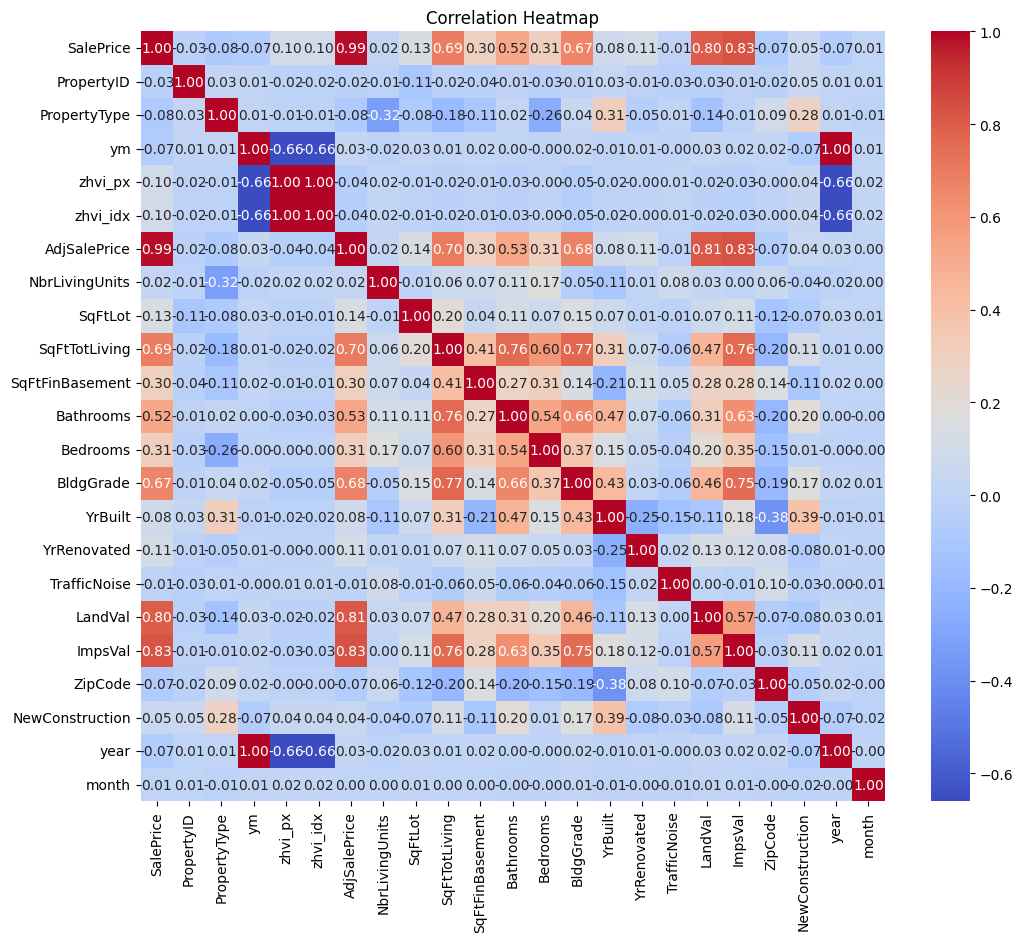

In [17]:
#  Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# drop unnecessary columns based on correlation
df.drop(['AdjSalePrice', 'PropertyID', 'PropertyType', 'NbrLivingUnits','SqFtLot','YrBuilt','YrRenovated','TrafficNoise','ZipCode','NewConstruction'], axis=1, inplace=True)


In [19]:
df.columns

Index(['SalePrice', 'ym', 'zhvi_px', 'zhvi_idx', 'SqFtTotLiving',
       'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'LandVal',
       'ImpsVal', 'year', 'month'],
      dtype='object')

### 6. Outliers Detection (Boxplot)

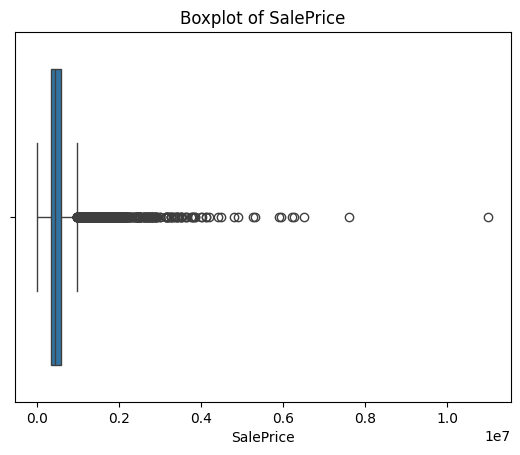

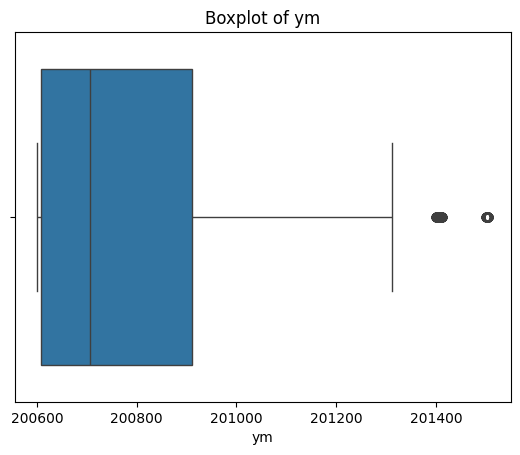

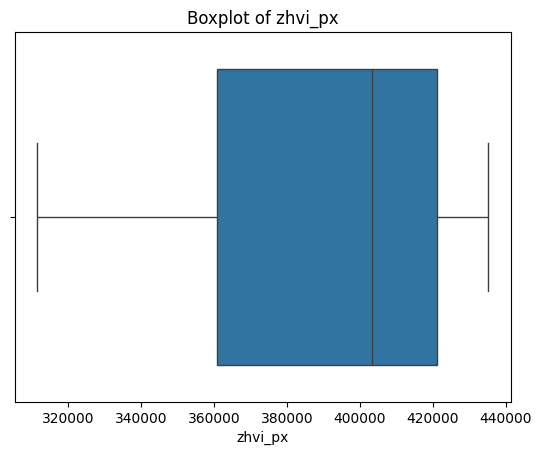

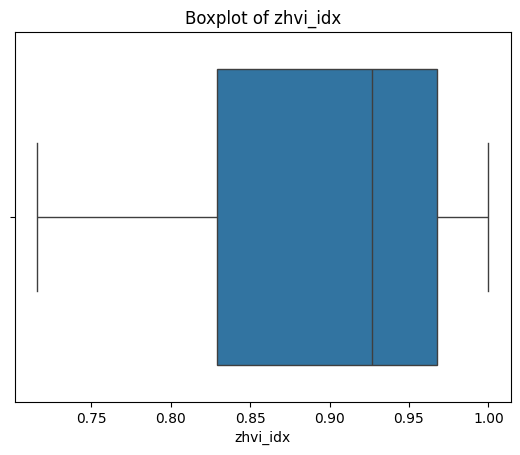

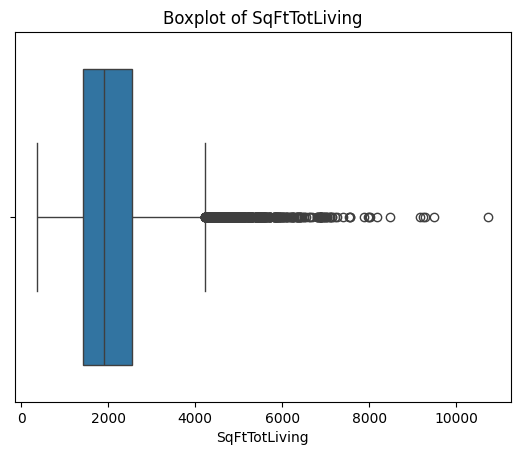

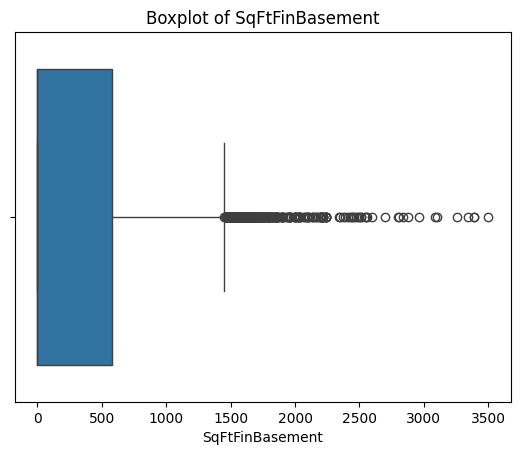

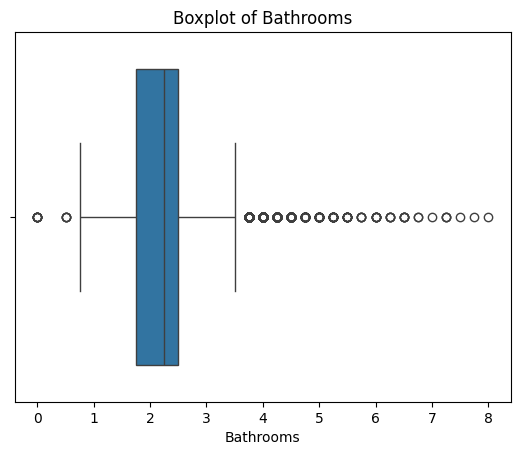

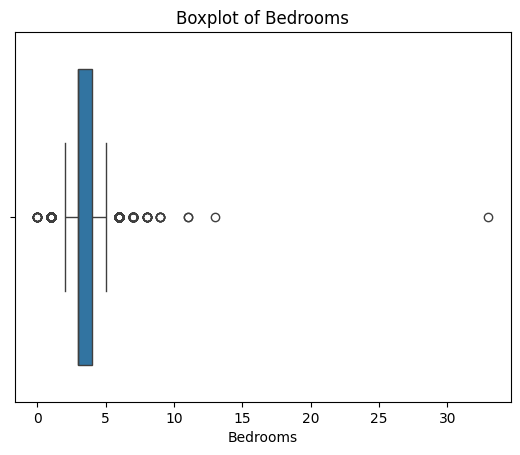

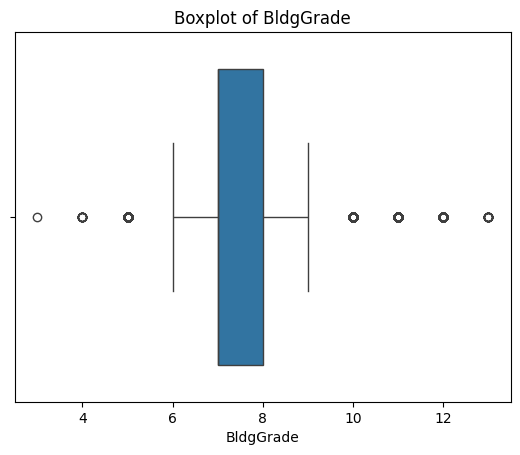

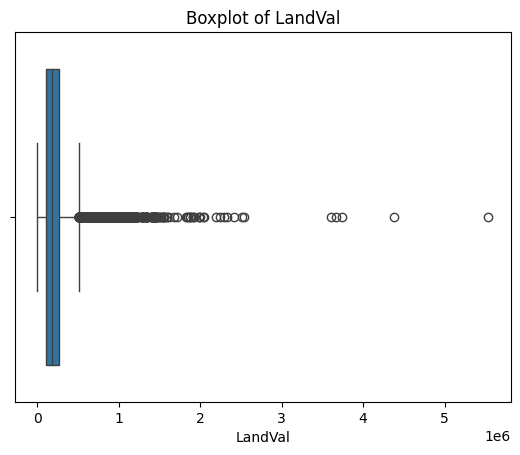

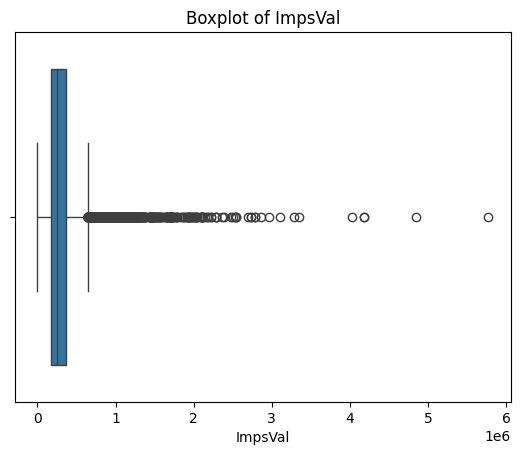

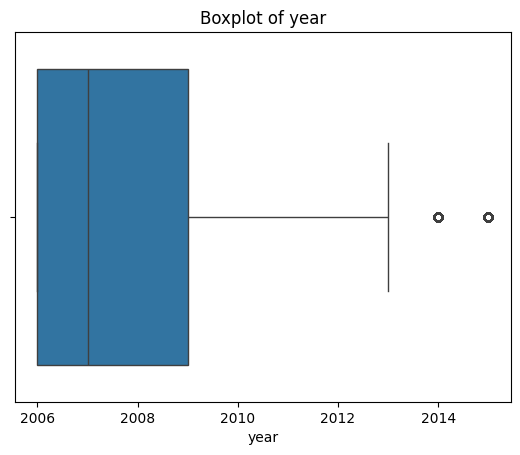

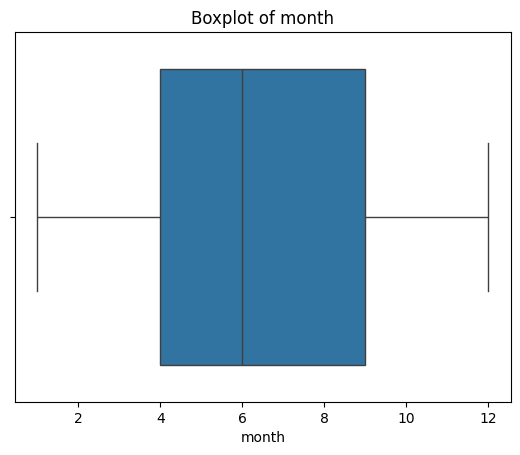

In [20]:
# Boxplot of each feature
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [21]:
# Select Numerical Columns
num_cols = df.select_dtypes(include=np.number).columns

In [22]:
# handling Outliers using For loop
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### 7. Feature Engineering

In [23]:
# Feature and target split
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [24]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,ym,zhvi_px,zhvi_idx,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,LandVal,ImpsVal,year,month
13977,201305,360700,0.828814,2450,0,2.25,3,8,167000,339000,2013,5
19335,200712,425200,0.977022,2140,0,2.50,3,8,185000,365000,2007,12
18932,200807,400300,0.919807,2410,960,2.75,3,8,108000,216000,2008,7
4713,200711,428400,0.984375,1390,0,1.75,2,7,290000,256000,2007,11
2178,201103,321600,0.738971,2620,1270,2.75,5,8,220000,297000,2011,3
...,...,...,...,...,...,...,...,...,...,...,...,...
14652,200605,400600,0.920496,840,0,1.00,2,6,172000,196000,2006,5
15483,200601,383200,0.880515,2470,0,2.50,3,8,91000,233000,2006,1
7167,200906,357100,0.820542,2950,0,2.50,3,9,442000,317000,2009,6
1179,201007,342800,0.787684,1760,800,2.00,3,7,234000,284000,2010,7


In [26]:
X_test

,ym,zhvi_px,zhvi_idx,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,LandVal,ImpsVal,year,month
12232,201003,350300,0.804917,1080,0,1.75,3,6,91000,187000,2010,3
12206,200909,351800,0.808364,1540,440,1.50,2,7,190000,164000,2009,9
14372,201005,347800,0.799173,1330,0,2.50,3,8,118000,317000,2010,5
3692,200612,423400,0.972886,1400,290,2.25,3,7,90000,161000,2006,12
11381,201107,314100,0.721737,2550,1250,2.50,4,7,165000,270000,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...
7420,200812,381600,0.876838,1060,220,1.75,2,7,263000,179000,2008,12
5265,200701,425600,0.977941,2040,790,2.50,5,8,235000,212000,2007,1
17712,201203,313600,0.720588,1520,0,2.50,3,7,128000,105000,2012,3
7907,200704,430900,0.990119,790,0,1.00,2,6,155000,141000,2007,4


In [27]:
y_train

13977    440000
19335    519000
18932    385000
4713     608000
2178     414000
          ...  
14652    380000
15483    399950
7167     635000
1179     440000
20205    845000
Name: SalePrice, Length: 14257, dtype: int64

In [28]:
y_test

12232    310000
12206    298000
14372    352950
3692     256000
11381    317500
          ...  
7420     430000
5265     465500
17712    175750
7907     311500
21933    364000
Name: SalePrice, Length: 3565, dtype: int64

In [29]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 8. Model Evaluation Metrics

### 8.1. Linear Regression Model

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
# prediction function
y_pred = lr.predict(X_test)
y_pred_train= lr.predict(X_train)

In [32]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", r2)

MAE: 39916.36006422076
MSE: 3276053733.4420276
RMSE: 57236.82148269615
R2 Score: 0.8417063116427352


In [33]:
MAE = mean_absolute_error(y_train, y_pred_train)
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_train, y_pred_train)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", r2)

MAE: 40159.07322161582
MSE: 3462202685.912575
RMSE: 58840.48509243083
R2 Score: 0.8252118144950835


### 8.2. Decision Tree

In [34]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [35]:
y_pred = dt.predict(X_test)
y_pred_train= dt.predict(X_train)

In [36]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", r2)

MAE: 46072.6748904776
MSE: 4587558983.663879
RMSE: 67731.52134467289
R2 Score: 0.7783364708985746


In [37]:
MAE = mean_absolute_error(y_train, y_pred_train)
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_train, y_pred_train)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", r2)

MAE: 33709.682132034715
MSE: 2288765795.532905
RMSE: 47841.047182653776
R2 Score: 0.8844523972918509


### 8.3. Random Forest Regressor

In [38]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [39]:
y_pred_train= rf.predict(X_train)

In [40]:
MAE = mean_absolute_error(y_train, y_pred_train)
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_train, y_pred_train)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", r2)

MAE: 18861.684446056202
MSE: 687645608.8418707
RMSE: 26222.997708917086
R2 Score: 0.9652844333091916


## 9. Best Model Selection

### 9.1. Import Models & Metrics

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


### 9.2. Evaluation Function

In [42]:
def model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }


### 9.3. Train All Models

In [43]:
results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = model_metrics(lr, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
results["Decision Tree"] = model_metrics(dt, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
results["Random Forest"] = model_metrics(rf, X_test, y_test)



### 9.4. Compare Model Performance

In [44]:
results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE,R2
Linear Regression,39916.360064,57236.821483,0.841706
Decision Tree,46072.674890,67731.521345,0.778336
Random Forest,39201.560465,56780.561447,0.844220


### 9.5. Select Best Model (Based on Highest R² Score)

In [45]:
best_model_name = results_df['R2'].idxmax()
best_model = (best_model_name)

### 9.6. Final Best Model Output

In [46]:
print("Best Model:", best_model_name)
print(results_df.loc[best_model_name])

Best Model: Random Forest
MAE     39201.560465
RMSE    56780.561447
R2          0.844220
Name: Random Forest, dtype: float64


### 10. Save the Model

In [47]:
import joblib

joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']

In [48]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [49]:
model = joblib.load("rf_model.pkl")
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [50]:
model = joblib.load("rf_model.pkl")

In [51]:
print("Model:", rf)
print("Scaler:", scaler)
print("X columns:", list(X.columns))
print("X shape:", X.shape)
print("First row X:", X.iloc[0].values)
print("Prediction on training sample:", rf.predict(scaler.transform([X.iloc[0]])))


Model: RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)
Scaler: StandardScaler()
X columns: ['ym', 'zhvi_px', 'zhvi_idx', 'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'LandVal', 'ImpsVal', 'year', 'month']
X shape: (17822, 12)
First row X: [2.00701000e+05 4.25600000e+05 9.77941176e-01 2.06000000e+03
 9.00000000e+02 1.75000000e+00 4.00000000e+00 8.00000000e+00
 1.83000000e+05 2.75000000e+05 2.00700000e+03 1.00000000e+00]
Prediction on training sample: [483459.66586273]


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
print(model.predict(X_test[:5]))


[261717.43772495 329555.23571524 371488.07567559 307856.98170821
 390920.01377457]


In [55]:
X.columns

Index(['ym', 'zhvi_px', 'zhvi_idx', 'SqFtTotLiving', 'SqFtFinBasement',
       'Bathrooms', 'Bedrooms', 'BldgGrade', 'LandVal', 'ImpsVal', 'year',
       'month'],
      dtype='object')